In [1]:
# classification of unfilled metadata taking only filled rows

import pandas as pd

df = pd.read_csv('../dataset/metadata_unfilled.csv')


def convert_bool_to_str(value):
    if isinstance(value, bool):
        return "True" if value else "False"
    return value

# Apply the conversion function to each column
for col in df.columns:
    df[col] = df[col].map(convert_bool_to_str)


In [2]:
df = df.drop(columns=['patient_id', 'lesion_id', 'img_id'])

In [3]:
df_cleaned = df.copy()

In [4]:
df = df_cleaned[~df_cleaned.apply(lambda row: row.astype(str).str.contains('UNK').any(), axis=1)]

df = df.dropna()

In [5]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("\n")

Column: smoke
['False' 'True']


Column: drink
['False' 'True']


Column: background_father
['POMERANIA' 'GERMANY' 'BRAZIL' 'NETHERLANDS' 'ITALY' 'POLAND' 'PORTUGAL'
 'BRASIL' 'AUSTRIA']


Column: background_mother
['POMERANIA' 'ITALY' 'GERMANY' 'BRAZIL' 'POLAND' 'NORWAY' 'PORTUGAL'
 'NETHERLANDS' 'FRANCE' 'SPAIN']


Column: age
[55 79 52 74 58 78 60 64 54 82 62 63 49 31 36 75 77 44 56 80 48 51 47 53
 69 59 57 71 83 46 66 70 85 41 67 61 76 14 87 94 90 89 39 26 40 68 22 72
 81 92 88 86 65 32 21 45 43 35 84 73 50 33 37 91 42 27 38 30]


Column: pesticide
['False' 'True']


Column: gender
['FEMALE' 'MALE']


Column: skin_cancer_history
['True' 'False']


Column: cancer_history
['True' 'False']


Column: has_piped_water
['True' 'False']


Column: has_sewage_system
['True' 'False']


Column: fitspatrick
[3. 1. 2. 4. 5. 6.]


Column: region
['NECK' 'FOREARM' 'FACE' 'CHEST' 'THIGH' 'NOSE' 'BACK' 'ARM' 'HAND' 'EAR'
 'FOOT' 'ABDOMEN' 'LIP' 'SCALP']


Column: diameter_1
[ 6.   5.  15.   9.  20. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['diagnostic'])
Y = df['diagnostic']

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

print("Classes:", label_encoder.classes_)


Classes: ['ACK' 'BCC' 'MEL' 'NEV' 'SCC' 'SEK']


In [8]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='mlogloss')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8585858585858586


Classification Report:
              precision    recall  f1-score   support

         ACK       0.82      0.83      0.82        48
         BCC       0.87      0.93      0.90       109
         MEL       1.00      0.86      0.92         7
         NEV       1.00      0.83      0.91         6
         SCC       0.82      0.64      0.72        22
         SEK       0.80      0.67      0.73         6

    accuracy                           0.86       198
   macro avg       0.89      0.79      0.83       198
weighted avg       0.86      0.86      0.86       198



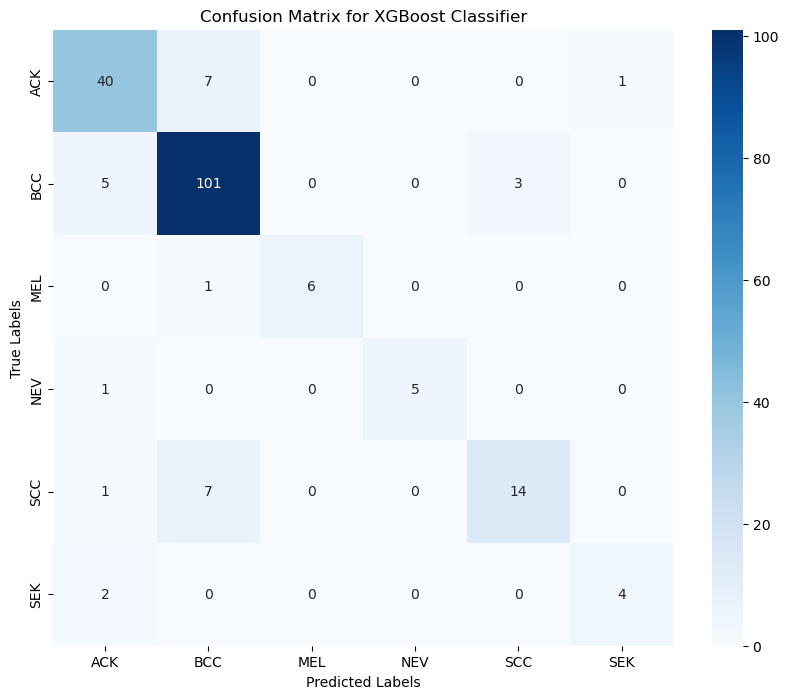

In [12]:
# Classification report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'], yticklabels=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()